In [32]:
import csv

csv_file = 'goodreads_books.csv'
column_index = 1

unique_values = set()

with open(csv_file, 'r', newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        if len(row) > column_index:
            unique_values.add(row[column_index])

print("Unique values in column:", unique_values)
print(len(unique_values))

Unique values in column: {'', 'nep', 'gez', 'nob', 'gmh', 'rup', 'bam', 'wak', 'guj', 'raj', 'dan', 'tam', 'crh', 'en-CA', 'ger', 'ind', 'fin', 'cze', 'egy', 'ton', 'nno', 'tut', 'bug', 'kir', 'nl', 'kur', 'roa', 'kal', 'kat', 'enm', 'ine', 'div', 'en-IN', 'tib', 'swa', 'elx', 'ori', 'nav', 'ast', 'zap', 'slv', 'arp', 'ale', 'fre', 'mal', 'lav', 'sqi', 'rom', 'scn', 'gre', 'phi', 'language_code', 'fan', 'chp', 'pra', 'kau', 'rus', 'myn', 'kok', 'asm', 'bul', 'bas', 'ara', 'aus', 'eng', 'fil', 'hat', 'hye', 'glg', 'san', 'chv', 'che', 'mlt', 'en-GB', 'ang', 'ita', 'dua', 'en-US', 'smn', 'en', 'abk', 'cor', 'non', 'slo', 'oci', 'apa', 'rum', 'mul', 'tup', 'epo', 'ilo', 'pol', 'tgk', 'nah', 'und', 'bos', 'srp', 'grc', 'roh', 'vec', 'aze', 'est', 'khm', 'mri', 'run', 'tha', 'mar', 'arg', 'sin', 'lao', 'chi', 'jpn', 'sot', 'tur', 'jbo', 'her', 'sun', 'kan', 'alg', 'vai', 'wel', 'sla', 'hin', 'iro', 'aka', 'hmn', 'swe', 'dgr', 'din', 'fro', 'arw', 'snd', 'es-MX', 'inh', 'pes', 'pan', 'Select

In [33]:
#Display charts of language distribution

import matplotlib.pyplot as plt

def count_values_in_column(csv_file, column_name):
    value_counts = {}
    with open(csv_file, 'r', newline='') as file:
        reader = csv.DictReader(file)
        for row in reader:
            value = row[column_name]
            if value in value_counts:
                value_counts[value] += 1
            else:
                value_counts[value] = 1
    return value_counts

def group_language_codes(value_counts):
    grouped_counts = {'English': 0, 'Other': 0}
    for value, count in value_counts.items():
        if value in ['eng', 'en-US', 'en-GB', 'en-CA']:
            grouped_counts['English'] += count
        else:
            grouped_counts['Other'] += count
    return grouped_counts

csv_file = 'goodreads_books.csv'
column_name = 'language_code'

value_counts = count_values_in_column(csv_file, column_name)
grouped_counts = group_language_codes(value_counts)

# Pie chart
labels = ['English', 'Other']
sizes = [grouped_counts['English'], grouped_counts['Other']]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Language Codes')
plt.axis('equal')
# plt.show()
plt.savefig('graphs/language_pie.png')

# Bar chart
languages = ['eng', 'en-US', 'en-GB', 'en-CA']
counts = [value_counts.get(lang, 0) for lang in languages]
plt.figure(figsize=(10, 6))
plt.bar(languages, counts, color='skyblue')
plt.xlabel('Language Code')
plt.ylabel('Count')
plt.title('Counts of Specific Language Codes')
# plt.savefig('graphs/language_bar.png')
# plt.show()
# plt.savefig('language_bar.png')


KeyboardInterrupt: 

In [34]:
#Filter books csv to only english results

def filter_csv_by_column(csv_file, language, allowed_langs):
    filtered_rows = []
    with open(csv_file, 'r', newline='') as file:
        reader = csv.DictReader(file)
        for row in reader:
            lang = row[language]
            if lang in allowed_langs:
                filtered_rows.append(row)
    return filtered_rows

def write_csv(filtered_rows, output_csv_file):
    if not filtered_rows:
        print("No rows to write to CSV.")
        return
    
    fieldnames = filtered_rows[0].keys()
    with open(output_csv_file, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(filtered_rows)

csv_file = 'goodreads_books.csv'
column_name = 'language_code'
allowed_values = ['eng', 'en-US', 'en-GB', 'en-CA']
output_csv_file = 'books_filtered_by_language.csv'

filtered_rows = filter_csv_by_column(csv_file, column_name, allowed_values)
write_csv(filtered_rows, output_csv_file)


Min value of bools is bookId isdigit: True
Min length of bookId is: 1
Max length of bookId is: 8


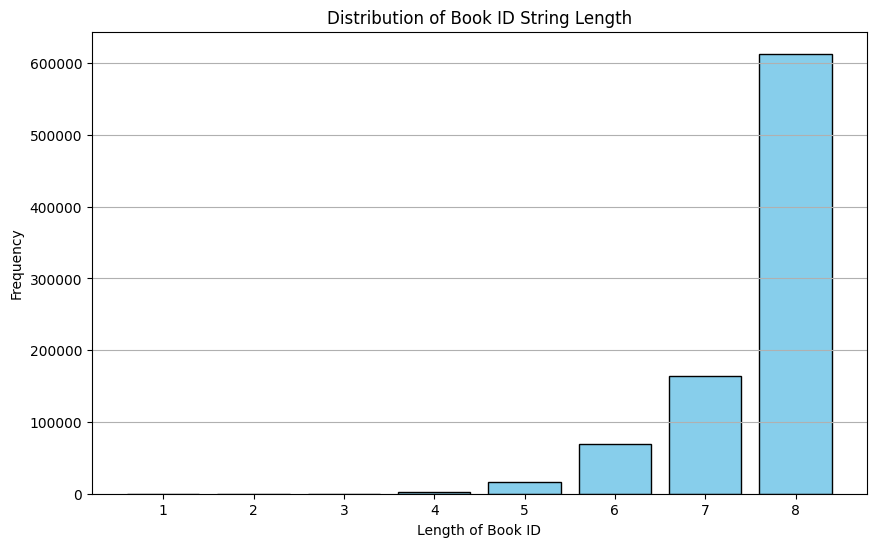

In [3]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('books_filtered_by_language.csv')
df['book_id'] = df['book_id'].astype(str)
book_id_lengths = df['book_id'].str.len()
book_id_isDigits = df['book_id'].str.isdigit()
print(f"Min value of bools is bookId isdigit: {book_id_isDigits.min()}")
print(f"Min length of bookId is: {book_id_lengths.min()}")
print(f"Max length of bookId is: {book_id_lengths.max()}")

length_counts = book_id_lengths.value_counts().sort_index()

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(length_counts.index, length_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Book ID String Length')
plt.xlabel('Length of Book ID')
plt.ylabel('Frequency')
plt.xticks(length_counts.index)
plt.grid(axis='y')
plt.show()
# plt.savefig('graphs/id_bar.png')
#All entries have a valid book id

865919
Before filtering: mean 261.22573644231534, median 248.0, std 1267.3623665481525
Book with less than 1 and more than inf have been filtered out.
601997
After filtering: mean 262.32401822600445, median 249.0, std 1269.9103570325447
After filtering: mean 262.32401822600445, median 249.0, std 1269.9103570325447
601997


/var/folders/v4/y0kckng111sc87kt_95clzgr0000gn/T/ipykernel_47968/3738276586.py:54: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_num_pages, shade=True, color='skyblue')


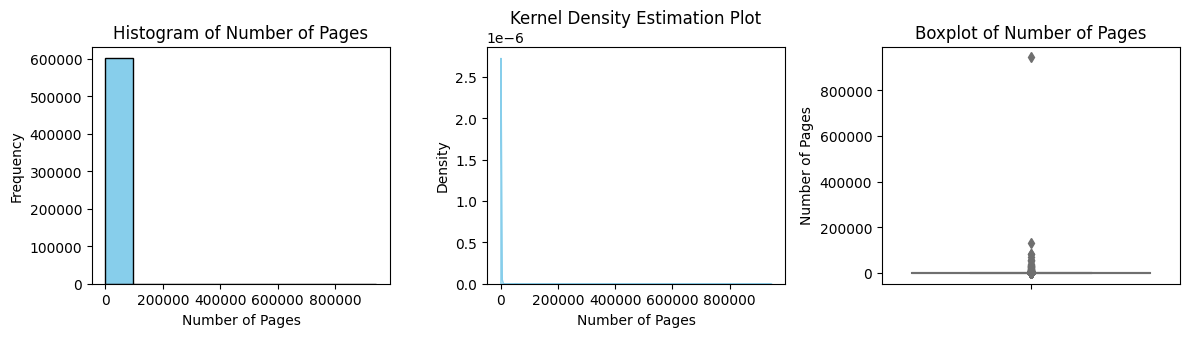

In [4]:
# import pandas as pd
# import seaborn as sns

df = pd.read_csv('books_filtered_by_language.csv')
num_pages = df['num_pages']

mean_num_pages = num_pages.mean()
median_num_pages = num_pages.median()
std_num_pages = num_pages.std()

# Define the range based on mean and standard deviation
# range_min = mean_num_pages - 1 * std_num_pages
# range_max = mean_num_pages + 1 * std_num_pages
range_min = 1
print(len(num_pages))
#Stats before filtering
print(f"Before filtering: mean {mean_num_pages}, median {median_num_pages}, std {std_num_pages}")
# Filter out outliers
# filtered_num_pages = num_pages
filtered_num_pages = num_pages[(num_pages >= range_min)] #& (num_pages <= range_max)

print(f"Book with less than {range_min} and more than inf have been filtered out.")
print(len(filtered_num_pages))
mean_num_pagesA = filtered_num_pages.mean()
median_num_pagesA = filtered_num_pages.median()
std_num_pagesA = filtered_num_pages.std()

print(f"After filtering: mean {mean_num_pagesA}, median {median_num_pagesA}, std {std_num_pagesA}")


# range_min = mean_num_pagesA - 1 * std_num_pagesA
# range_max = mean_num_pagesA + 1 * std_num_pagesA
# print(f"Book with less than {range_min} and more than {range_max} have been filtered out.")

# filtered_num_pages = filtered_num_pages[(filtered_num_pages >= range_min) & (filtered_num_pages <= range_max)]

# mean_num_pagesA = filtered_num_pages.mean()
# median_num_pagesA = filtered_num_pages.median()
# std_num_pagesA = filtered_num_pages.std()

print(f"After filtering: mean {mean_num_pagesA}, median {median_num_pagesA}, std {std_num_pagesA}")
print(len(filtered_num_pages))
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(2, 3, 1)
plt.hist(filtered_num_pages, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Pages')

# KDE Plot
plt.subplot(2, 3, 2)
sns.kdeplot(filtered_num_pages, shade=True, color='skyblue')
plt.xlabel('Number of Pages')
plt.ylabel('Density')
plt.title('Kernel Density Estimation Plot')

# Boxplot
plt.subplot(2, 3, 3)
sns.boxplot(y=filtered_num_pages, color='skyblue')
plt.ylabel('Number of Pages')
plt.title('Boxplot of Number of Pages')

# # Violin Plot
# plt.subplot(2, 3, 4)
# sns.violinplot(y=filtered_num_pages, color='skyblue')
# plt.ylabel('Number of Pages')
# plt.title('Violin Plot of Number of Pages')

# # ECDF Plot
# plt.subplot(2, 3, 5)
# sorted_num_pages = filtered_num_pages.sort_values()
# y = pd.Series(range(1, len(sorted_num_pages) + 1)) / len(sorted_num_pages)
# plt.plot(sorted_num_pages, y, marker='.', linestyle='none', color='skyblue')
# plt.xlabel('Number of Pages')
# plt.ylabel('ECDF')
# plt.title('Empirical Cumulative Distribution Function (ECDF) of Number of Pages')

plt.tight_layout()
plt.show()
# plt.savefig('graphs/page_num_dist.png')


In [5]:
def filter_csv_by_column(csv_file, num_pages):
    df = pd.read_csv(csv_file)
    
    # Clean the NaN values only in the 'num_pages' column
    df[num_pages] = pd.to_numeric(df[num_pages], errors='coerce').fillna(df[num_pages])
    
    # Filter rows based on valid numeric values in 'num_pages' column and within the specified range
    filtered_rows = df[df[num_pages] >= range_min]
    return filtered_rows.to_dict('records')

def write_csv(filtered_rows, output_csv_file):
    if not filtered_rows:
        print("No rows to write to CSV.")
        return
    
    fieldnames = filtered_rows[0].keys()
    with open(output_csv_file, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(filtered_rows)

csv_file = 'books_filtered_by_language.csv'
column_name = 'num_pages'
output_csv_file = 'books_filtered_by_language.csv'

filtered_rows = filter_csv_by_column(csv_file, column_name)
write_csv(filtered_rows, output_csv_file)


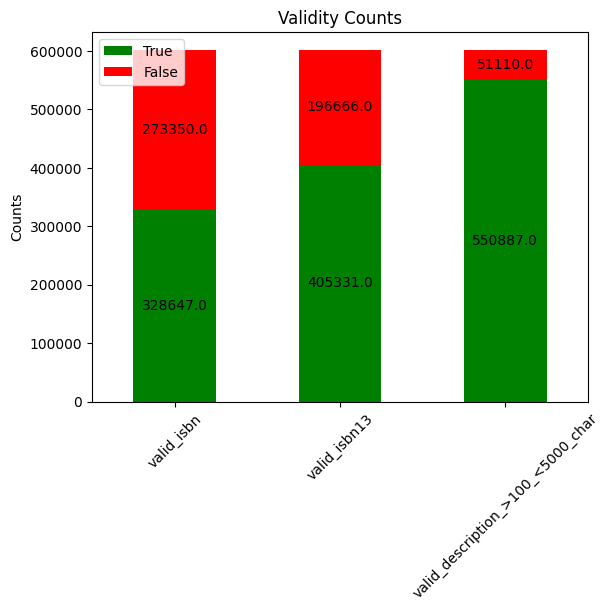

In [6]:
import math

# Code taken from geeksforgeeks.
def isValidISBN(isbn): 
  
    # check for length 
    if len(isbn) != 10 or not isbn[:10].isdigit(): 
        return False
      
    # Computing weighted sum  
    # of first 9 digits 
    _sum = 0
    for i in range(9): 
        if 0 <= int(isbn[i]) <= 9: 
            _sum += int(isbn[i]) * (10 - i) 
        else: 
            return False
          
    # Checking last digit 
    if(isbn[9] != 'X' and 
       not isbn[9].isdigit()): 
        return False
      
    # If last digit is 'X', add  
    # 10 to sum, else add its value. 
    _sum += 10 if isbn[9] == 'X' else int(isbn[9]) 
      
    # Return true if weighted sum of  
    # digits is divisible by 11 
    return (_sum % 11 == 0) 
##################################


# Taken from rosettacode.org
def isValidISBN13(n):
    n = n.replace('-','').replace(' ', '')
    if len(n) != 13 or not n.isdigit():
        return False
    product = (sum(int(ch) for ch in n[::2]) 
               + sum(int(ch) * 3 for ch in n[1::2]))
    return product % 10 == 0
##################################


def validate_row(row, exclusive):
    number_valid = 0
    isbn = row['isbn']
    isbn13 = row['isbn13']
    description = row['description']
    if not pd.isna(isbn):
        isbn_valid = isValidISBN(str(isbn))
    else:
        isbn_valid = False
    if not pd.isna(isbn13):
        isbn13_valid = isValidISBN13(str(isbn13))
    else:
        isbn13_valid = False
    if not pd.isna(description):
        description_valid = isinstance(description, str) and len(description) >= 100 and len(description) <= 5000
    else:
        description_valid = False
    if exclusive:
        number_valid += (isbn_valid + isbn13_valid + description_valid)
        return str(number_valid)
        # isbn_valid or isbn13_valid or description_valid,
    else:
        return isbn_valid, isbn13_valid, description_valid

df = pd.read_csv('books_filtered_by_language.csv', usecols=['isbn', 'isbn13', 'description'])

# Apply to each row
validity_results = df.apply(validate_row, axis=1, args=(False,))

# Count the number of true and false values for each category
isbn_valid_counts = validity_results.apply(lambda x: x[0]).value_counts()
# print(f" testing {type(isbn_valid_counts)}")
isbn13_valid_counts = validity_results.apply(lambda x: x[1]).value_counts()
description_valid_counts = validity_results.apply(lambda x: x[2]).value_counts()

index = ['valid_isbn','valid_isbn13','valid_description_>100_<5000_char']

data = {
    'True': [isbn_valid_counts.get(True, 0), isbn13_valid_counts.get(True, 0), description_valid_counts.get(True, 0)],
    'False': [isbn_valid_counts.get(False, 0), isbn13_valid_counts.get(False, 0), description_valid_counts.get(False, 0)]
}
df_counts = pd.DataFrame(data, index=index)

ax = df_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xticks(rotation=45)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='black')
ax.legend(loc='upper left')
ax.set_ylabel('Counts')
ax.set_title('Validity Counts')
plt.show()
# plt.savefig('graphs/validity_counts.png')

 22145 had false for all 3 metrics.
 579852 had true for at least one of 3 metrics.


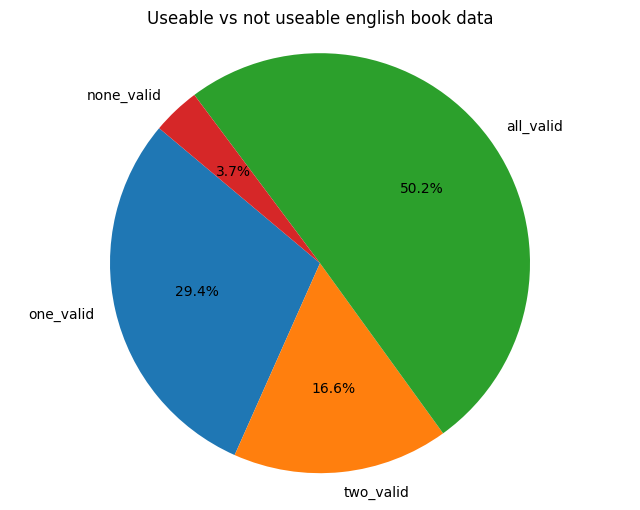

In [7]:
df = pd.read_csv('books_filtered_by_language.csv')

valid_rows = df.apply(validate_row, axis=1, args=(True,))
false_count = valid_rows.value_counts()["0"]

one_count = valid_rows.value_counts()["1"]
two_count = valid_rows.value_counts()["2"]
all_count = valid_rows.value_counts()["3"]

true_count = one_count+two_count+all_count
print(f" {false_count} had false for all 3 metrics.")
print(f" {true_count} had true for at least one of 3 metrics.")

labels = ['one_valid', 'two_valid', 'all_valid', 'none_valid']
sizes = [one_count, two_count, all_count, false_count]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Useable vs not useable english book data')
plt.axis('equal')
plt.show()
# plt.savefig('graphs/valid_pie.png')

In [10]:
df = pd.read_csv('books_filtered_by_language.csv')
filtered_df = df[pd.to_numeric(valid_rows) >= 1]

test = filtered_df.apply(validate_row, axis=1, args=(True,))
test_count = test.value_counts().get("0", 0)
assert test_count == 0

filtered_df.to_csv('books_filtered_by_language.csv', index=False)

In [11]:
# df = pd.read_csv('books_filtered_by_language.csv')
# notzero = df[df['description'].str.len() > 0]['description']

# print(notzero.mean())

In [1]:
import csv

def count_csv_rows(filename):
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        row_count = sum(1 for row in reader)
    return row_count

# Usage
filename = 'goodreads_interactions.csv'
num_rows = count_csv_rows(filename)
print("Number of rows:", num_rows)

Number of rows: 228648343


In [3]:
def count_unique_users(filename):
    unique_users = set()
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            user_id = row[0]  
            unique_users.add(user_id)
    return len(unique_users)

filename = 'goodreads_interactions.csv'
num_unique_users = count_unique_users(filename)
print("Number of unique users:", num_unique_users)


Number of unique users: 876146


In [4]:
average = 228648343 / 876146
print(f"The average number of interactions per user is: {average}")

The average number of interactions per user is: 260.9705950834678


In [2]:
import csv

def get_filtered_book_ids(filtered_filename):
    book_ids = set()
    with open(filtered_filename, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip header if present
        for row in reader:
            book_id = row[4]  
            book_ids.add(book_id)
    return book_ids

def filter_interactions(interactions_filename, filtered_filename, filtered_book_ids):
    print("Filtering...")
    with open(interactions_filename, 'r', newline='') as infile, open(filtered_filename, 'w', newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        writer.writerow(next(reader))  
        for row in reader:
            if row[2] and row[4]:
                book_id = row[1]
                if book_id in filtered_book_ids:
                    writer.writerow(row)
    print("Done.")

interactions_filename = 'goodreads_interactions.csv'
filtered_filename = 'filtered_goodreads_interactions.csv'
filtered_book_ids = get_filtered_book_ids('books_filtered_by_language.csv')

# Filter interactions
filter_interactions(interactions_filename, filtered_filename, filtered_book_ids)


Filtering...
Done.


In [3]:
def count_rows_and_unique_users(filename):
    row_count = 0
    unique_users = set()
    unique_books = set()
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            row_count += 1
            # Add user_id to unique_users set
            user_id = row[0]
            unique_users.add(user_id)
            book_id = row[1]
            unique_books.add(book_id)
    num_unique_users = len(unique_users)
    num_unique_books = len(unique_books)
    return row_count, num_unique_users, num_unique_books

filename = 'filtered_goodreads_interactions.csv'
row_count, num_unique_users, num_unique_books = count_rows_and_unique_users(filename)
print("Number of rows:", row_count)
print("Number of unique users:", num_unique_users)
print("Number of unique books:", num_unique_books)
average = row_count / num_unique_users
print(f"After filtering the average number of book interactions per user is {average}.")


Number of rows: 24603818
Number of unique users: 640734
Number of unique books: 506221
After filtering the average number of book interactions per user is 38.39942628298171.


In [4]:
# import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

def calculate_time_difference(date_added, started_at):
    date_added = datetime.strptime(date_added, "%Y-%m-%d %H:%M:%S")
    started_at = datetime.strptime(started_at, "%Y-%m-%d %H:%M:%S")
    time_difference = (started_at - date_added).total_seconds()
    return time_difference

def process_csv(filename):
    time_differences = []
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader) 
        for row in reader:
            date_added = row[2]
            started_at = row[4]
            time_difference = calculate_time_difference(date_added, started_at)
            if time_difference >= 86400 and time_difference <= 31536000:
                time_differences.append(time_difference)
    return time_differences

def plot_histogram(data):
    plt.hist(data, bins=30, edgecolor='black')
    plt.title('Distribution of Time Differences')
    plt.xlabel('Time Difference (seconds)')
    plt.ylabel('Frequency')
    plt.show()

def plot_boxplot(data):
    plt.boxplot(data)
    plt.title('Boxplot of Time Differences')
    plt.ylabel('Time Difference (seconds)')
    plt.show()

def calculate_statistics(data):
    mean = np.mean(data)
    std = np.std(data)
    median = np.median(data)
    return mean, std, median

filename = 'filtered_goodreads_interactions.csv'
time_differences = process_csv(filename)


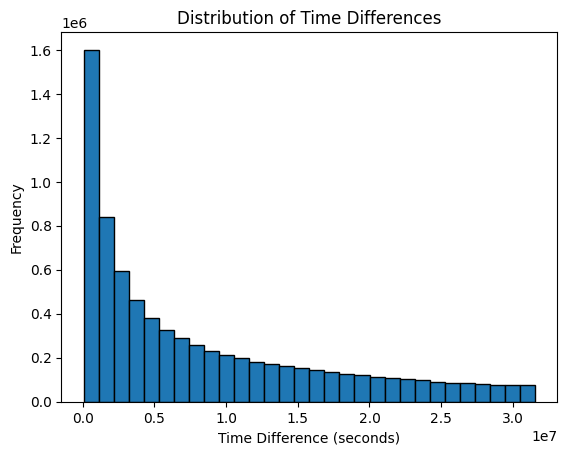

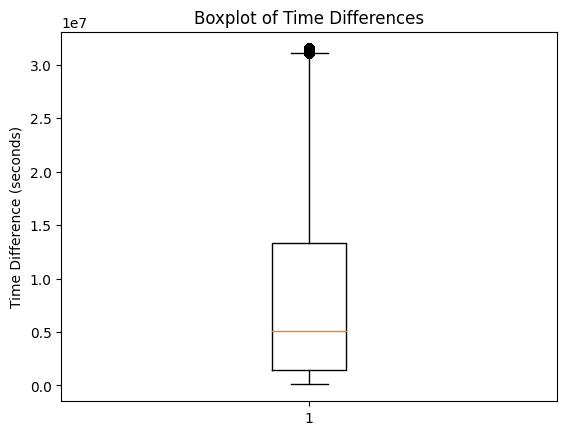

Mean: 8348691.671864066
Standard Deviation: 8437143.28091364
Median: 5064162.0


In [5]:
# Plot histogram and boxplot
plot_histogram(time_differences)
plot_boxplot(time_differences)

mean, std, median = calculate_statistics(time_differences)
print("Mean:", mean)
print("Standard Deviation:", std)
print("Median:", median)

In [35]:
# import csv
# import numpy as np
# import pandas as pd
# lengths = []

# df = pd.read_csv('books_filtered_by_language.csv')
# num_pages = df['num_pages']

# mean_num_pages = num_pages.mean()
# median_num_pages = num_pages.median()
# std_num_pages = num_pages.std()
    
    # count = 0
    # for row in reader:
    #     if int(row[6] > 0:
    #         lengths.append(int(row[6]))
        
    # print(count)
    
# print(np.mean(lengths))

            


In [6]:
# print(num_pages.argmax())
# print(mean_num_pages)
# print(std_num_pages)

NameError: name 'num_pages' is not defined

In [39]:
# df.iloc[6743]['description']

'"Oxford\'s American editors drew on its 200-million-word databank of contemporary English, plus the citation files of the Oxford English Dictionary. The result is an all-new and updated American dictionary, the crowning achievement in the Oxford line of American dictionaries and thesauruses." "To provide unprecedented clarity, the entries are organized around core meanings, reflecting the way people think about words and eliminating the clutter and confusion of a traditional dictionary entry. Each entry plainly shows the major meaning or meanings of the word, plus any related senses, arranged in intuitive constellations of connected meanings. Definitions are supplemented by illustrative, in-context examples of actual usage." This new edition of The New Oxford American Dictionary includes a guide to the pronunciations on every page spread, a new etymology essay, completely updated and revised maps, and more than a thousand new entries, covering everything new in our language from low-c

In [9]:
# print(np.std(lengths))
# print(np.median(lengths))

543.7679651128094
783.0


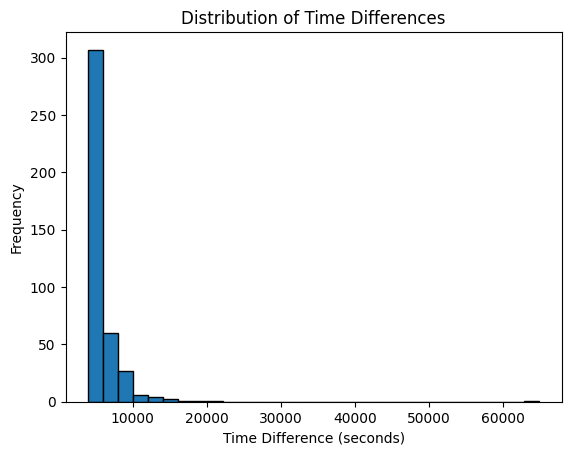

In [17]:
# import matplotlib.pyplot as plt

# length = [x for x in lengths if x >= 4000]

# def plot_histogram(data):
#     plt.hist(data, bins=30, edgecolor='black')
#     plt.title('Distribution of Time Differences')
#     plt.xlabel('Time Difference (seconds)')
#     plt.ylabel('Frequency')
#     plt.show()
    
    
plot_histogram(length)

In [1]:
# from datetime import datetime
# import matplotlib.pyplot as plt
# import numpy as np
# import csv

# def calculate_time_difference(date_added, started_at):
#     date_added = datetime.strptime(date_added, "%Y-%m-%d %H:%M:%S")
#     started_at = datetime.strptime(started_at, "%Y-%m-%d %H:%M:%S")
#     time_difference = (started_at - date_added).total_seconds()
#     return time_difference

# filename = 'goodreads_interactions.csv'
# diffs = []
# with open(filename, 'r', newline='') as csvfile:
#         reader = csv.reader(csvfile)
#         next(reader) 
#         for row in reader:
#             if row[2] and row[4]:
#                 diff = calculate_time_difference(row[2], row[4])
#                 diffs.append(diff)

# counts = [x for x in diffs if x >= 31536000]
            
# print(len(counts))


2539969


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random

df = pd.read_csv('Datasets/filtered_goodreads_interactions.csv')

user_groups = df.groupby('user_id')
users = list(user_groups.groups.keys())
random.shuffle(users)

train_users, test_users = train_test_split(users, test_size=0.2, random_state=42)
validate_users, test_users = train_test_split(test_users, test_size=0.5, random_state=42)

train_interactions = pd.concat([user_groups.get_group(user) for user in train_users])
validate_interactions = pd.concat([user_groups.get_group(user) for user in validate_users])
test_interactions = pd.concat([user_groups.get_group(user) for user in test_users])

train_interactions.to_csv('train_interactions.csv', index=False)
validate_interactions.to_csv('validate_interactions.csv', index=False)
test_interactions.to_csv('test_interactions.csv', index=False)


In [4]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

train_interactions = pd.read_csv('train_interactions.csv')
validate_interactions = pd.read_csv('validate_interactions.csv')
test_interactions = pd.read_csv('test_interactions.csv')

train_user_groups = train_interactions.groupby('user_id')
validate_user_groups = validate_interactions.groupby('user_id')
test_user_groups = test_interactions.groupby('user_id')

def calculate_time_difference(date_added, started_at):
    date_added = datetime.strptime(date_added, "%Y-%m-%d %H:%M:%S")
    started_at = datetime.strptime(started_at, "%Y-%m-%d %H:%M:%S")
    time_difference = (started_at - date_added).total_seconds()
    return time_difference

def average_time_to_begin_reading_per_user(user_group):
    time_differences = []
    for index, row in user_group.iterrows():
        time_difference = calculate_time_difference(row['date_added'], row['started_at'])
        time_differences.append(time_difference)
    if time_differences:
        return np.mean(time_differences)
    else:
        return np.nan

avg_time_train = train_user_groups.apply(average_time_to_begin_reading_per_user).mean()
avg_time_validate = validate_user_groups.apply(average_time_to_begin_reading_per_user).mean()
avg_time_test = test_user_groups.apply(average_time_to_begin_reading_per_user).mean()

print("Average time to begin reading per user in train set (seconds):", avg_time_train)
print("Average time to begin reading per user in validation set (seconds):", avg_time_validate)
print("Average time to begin reading per user in test set (seconds):", avg_time_test)


Average time to begin reading per user in train set (seconds): 3190109.2636793377
Average time to begin reading per user in validation set (seconds): 3243173.2782404227
Average time to begin reading per user in test set (seconds): 3110960.8939525182
